## Data download 
Not using wget because of corss platform compatability

In [28]:
%pip install numpy matplot pandas pyarrow

('iris.csv', <http.client.HTTPMessage at 0x7f423373a470>)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rand
import urllib.request
import os

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
irisFilename = 'iris.csv'

urllib.request.urlretrieve(url, irisFilename)

In [8]:
a = np.linspace(0, 10, 10)
print(a)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


In [9]:
r = [rand.randint(-10, 10) for x in range(0, 30)]
print(r)

r = np.array(r)
print(r)

print(r[r > 5]) # Amazin'

[-10, 6, -2, 4, 9, -6, -8, 7, 10, -6, -2, -10, -9, -2, 7, -6, -3, -2, 5, 2, 6, 5, -7, 5, -1, 1, -6, 4, 3, -10]
[-10   6  -2   4   9  -6  -8   7  10  -6  -2 -10  -9  -2   7  -6  -3  -2
   5   2   6   5  -7   5  -1   1  -6   4   3 -10]
[ 6  9  7 10  7  6]


In [10]:
plt

<module 'matplotlib.pyplot' from '/home/qcerris-user/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [11]:
type(plt)

module

In [12]:
df = pd.read_csv(f'{dataFilename}')

In [13]:
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [29]:
parquetFilename = "data.parquet"

df.to_parquet(parquetFilename)
pdf = pd.read_parquet(parquetFilename)

psize = os.path.getsize(parquetFilename)
csvsize = os.path.getsize(irisFilename)

print(f'CSV filesize = {csvsize}\nParquet filesize = {psize}\n')

pdf[:10]


CSV filesize = 3975
Parquet filesize = 5401



sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa

In [30]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [38]:
df[['sepal.length', 'sepal.width', 'variety']][:10]

sepal.length  sepal.width variety
0           5.1          3.5  Setosa
1           4.9          3.0  Setosa
2           4.7          3.2  Setosa
3           4.6          3.1  Setosa
4           5.0          3.6  Setosa
5           5.4          3.9  Setosa
6           4.6          3.4  Setosa
7           5.0          3.4  Setosa
8           4.4          2.9  Setosa
9           4.9          3.1  Setosa

In [75]:
df.iloc[:5, :3]

sepal.length  sepal.width  petal.length
0           5.1          3.5           1.4
1           4.9          3.0           1.4
2           4.7          3.2           1.3
3           4.6          3.1           1.5
4           5.0          3.6           1.4

In [78]:
set(df['variety'])

{'Setosa', 'Versicolor', 'Virginica'}

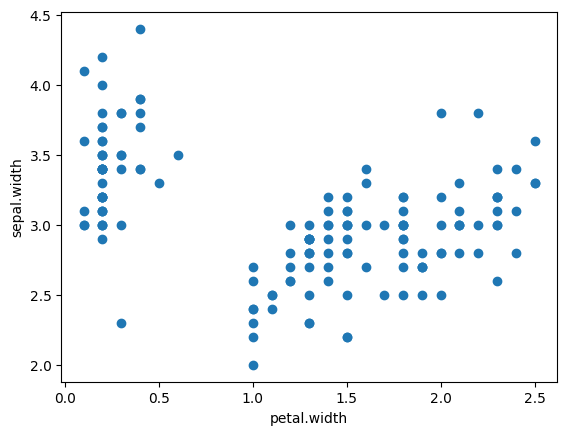

In [40]:
xlabel = 'petal.width'
ylabel = 'sepal.width'

x = df[[xlabel]]
y = df[[ylabel]]

plt.scatter(x, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()

In [80]:
l = ['c', 'r', 'g', 'b']
l.pop()

'b'

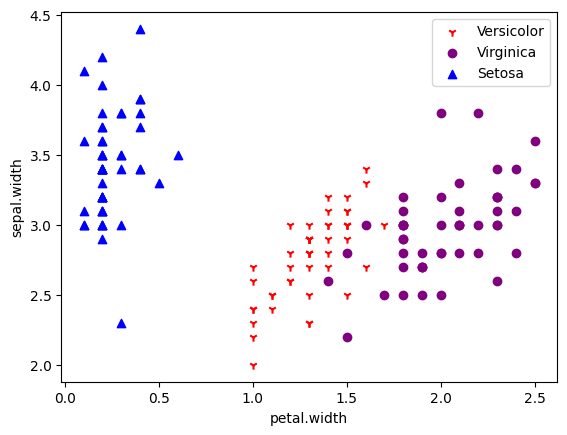

In [89]:
legend = np.array([])
xs = np.array([])
ys = np.array([])

markers = ['^', 'o', '1']
colors = ['blue', 'purple', 'red']

for variety in set(df['variety']):
    legend = np.append(legend, f'{variety}')
    
    x1 = df[[xlabel, 'variety']]
    x1 = x1[x1['variety'] == variety][[xlabel]]
    xs = np.append(xs, x1)
    
    y1 = df[[ylabel, 'variety']]
    y1 = y1[y1['variety'] == variety][[ylabel]]
    ys = np.append(ys, y1)
    
    plt.scatter(x1, y1, marker=markers.pop(), c=colors.pop())

    
plt.legend(legend)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()